In [13]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
#from pandas_profiling import ProfileReport

Matplotlib is building the font cache; this may take a moment.


In [26]:
# Assuming the data is downloaded as 'PS_20174392719_1491204439457_log.csv'
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

# checking the first 5 rows of the data
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [27]:
# checking the shape of the data
df.shape

(6362620, 11)

In [4]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (e.g., imputation or removal)
df.ffill(inplace=True) # Forward fill

# Check for duplicates
print(df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Validate data types
print(df.dtypes)

# Convert columns to correct data types if needed
# df['step'] = pd.to_numeric(df['step']) 

# Define and apply validation rules (example)
def validate_amount(amount):
  if amount <= 0:
    return False
  return True

df['amount_valid'] = df['amount'].apply(validate_amount)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
0
step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [5]:
# Currency Conversion (Assuming all transactions are in the same currency in this dataset)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_valid
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,True
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,True
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,True
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,True


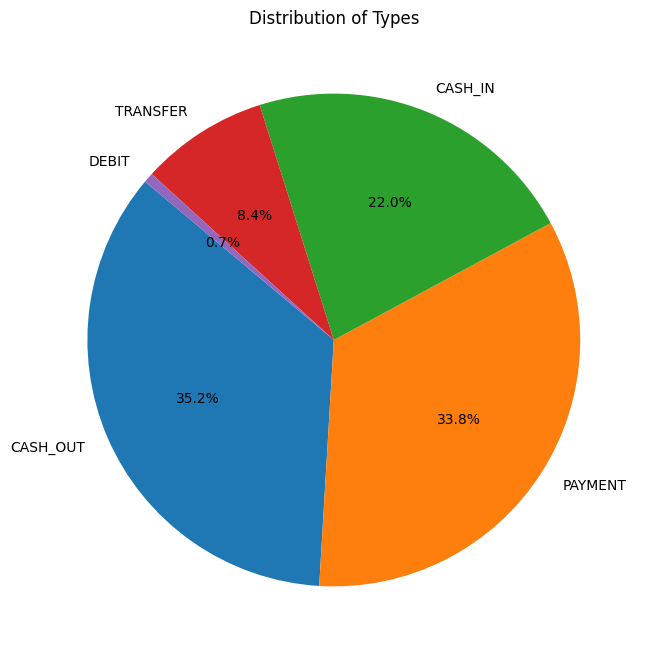

In [16]:
# Plot the pie chart by type
type_counts = df['type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Types')
plt.show()


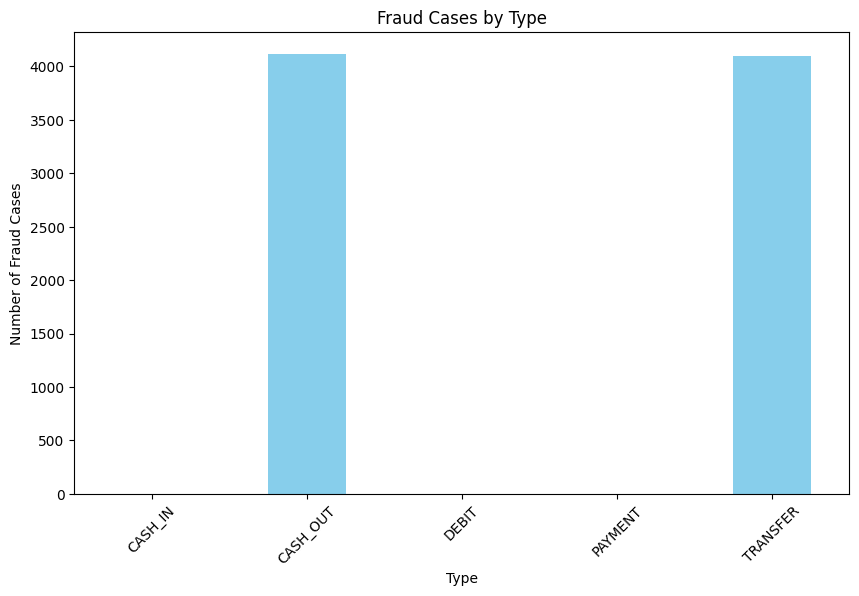

In [15]:
# Group by 'type' and 'isfraud' to get counts of fraud cases per type and plot the bar chart
type_fraud_counts = df.groupby('type')['isFraud'].sum()

plt.figure(figsize=(10, 6))
type_fraud_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Type')
plt.ylabel('Number of Fraud Cases')
plt.title('Fraud Cases by Type')
plt.xticks(rotation=45)
plt.show()


In [31]:
# Timestamp Standardization (assuming 'step' represents hours)
start_date = datetime(2017, 1, 1)  # Replace with the actual start date 
df['datetime'] = df['step'].apply(lambda x: start_date + pd.to_timedelta(x, unit='h'))


In [23]:
# Aggregate transactions by type and hour
hourly_transactions = df.groupby(['type', 'datetime']).agg({'amount': 'sum'}).reset_index()
print(hourly_transactions.head())

# Aggregate transactions by day
daily_transactions = df.groupby(['type', pd.Grouper(key='datetime', freq='D')]).agg({'amount': 'sum'}).reset_index()


      type            datetime       amount
0  CASH_IN 2017-01-01 01:00:00  85500789.61
1  CASH_IN 2017-01-01 02:00:00  32496559.82
2  CASH_IN 2017-01-01 03:00:00  21176788.56
3  CASH_IN 2017-01-01 04:00:00  23541190.43
4  CASH_IN 2017-01-01 05:00:00  25071346.06


In [32]:
# Check for inconsistencies after transformations (e.g., negative balances)
df.head()

# Can implement checks based on domain knowledge (e.g., transaction limits)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,datetime
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,2017-01-01 01:00:00
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,2017-01-01 01:00:00
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,2017-01-01 01:00:00
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,2017-01-01 01:00:00
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,2017-01-01 01:00:00


In [28]:
# Count the number of occurrences of each value in the 'isFraud' column
fraud_counts = df['isFraud'].value_counts()

# Calculate the percentage of fraud and non-fraud cases
fraud_percentage = (fraud_counts[1] / len(df)) * 100
non_fraud_percentage = (fraud_counts[0] / len(df)) * 100

# Print the fraud and non-fraud percentages
print("Fraud percentage:", fraud_percentage)
print("Non-fraud percentage:", non_fraud_percentage)


Fraud percentage: 0.12908204481801522
Non-fraud percentage: 99.87091795518198


In [29]:
print('\n The types of fraudulent transactions are {}'.format(\
list(df.loc[df.isFraud == 1].type.drop_duplicates().values)))

dfFraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
dfFraudCashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]

print ('\n The number of fraudulent TRANSFERs = {}'.\
       format(len(dfFraudTransfer)))

print ('\n The number of fraudulent CASH_OUTs = {}'.\
       format(len(dfFraudCashout)))


 The types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']

 The number of fraudulent TRANSFERs = 4097

 The number of fraudulent CASH_OUTs = 4116


In [10]:
# Generate descriptive statistics
print(df.describe())


# Create data profiling reports (consider using Pandas Profiling or other tools)
# from pandas_profiling import ProfileReport
# I have tried to install pandas_profiling, but I could not do that because of a lot of dependency injections.

# Generate profiling report
#profile = ProfileReport(df, title="Data Profiling Report", explorative=True)
#profile.to_file("data_profile_report.html")


               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  \
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06   
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06   
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00   
25%      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00   
50%      1.327057e+05    2.14661

In [33]:
# Overall summary statistics for transaction amount
mean_amount = df['amount'].mean()
median_amount = df['amount'].median()
std_amount = df['amount'].std()

print("Overall Transaction Amount Summary:")
print(f"Mean: {mean_amount}")
print(f"Median: {median_amount}")
print(f"Standard Deviation: {std_amount}")

# Grouped summary statistics by transaction type
grouped_stats = df.groupby('type')['amount'].agg(['mean', 'median', 'std'])
print("\nTransaction Amount Summary by Type:")
print(grouped_stats)

# Time-based summary statistics (e.g., total transaction amount per day)
daily_amount = df.groupby(df['datetime'].dt.date)['amount'].sum()
print("\nTotal Transaction Amount per Day:")
print(daily_amount)

Overall Transaction Amount Summary:
Mean: 179861.90354913071
Median: 74871.94
Standard Deviation: 603858.2314629931

Transaction Amount Summary by Type:
                   mean      median           std
type                                             
CASH_IN   168920.242004  143427.710  1.265083e+05
CASH_OUT  176273.964346  147072.185  1.753297e+05
DEBIT       5483.665314    3048.990  1.331854e+04
PAYMENT    13057.604660    9482.190  1.255645e+04
TRANSFER  910647.009645  486308.390  1.879574e+06

Total Transaction Amount per Day:
datetime
2017-01-01    9.173970e+10
2017-01-02    7.108987e+10
2017-01-03    9.281746e+08
2017-01-04    3.151848e+09
2017-01-05    1.686137e+09
2017-01-06    7.341008e+10
2017-01-07    6.700567e+10
2017-01-08    7.006377e+10
2017-01-09    5.796254e+10
2017-01-10    6.524498e+10
2017-01-11    6.041965e+10
2017-01-12    5.741696e+10
2017-01-13    1.389910e+11
2017-01-14    1.001902e+11
2017-01-15    7.746717e+10
2017-01-16    6.792215e+10
2017-01-17    7.36741

In [11]:
#  Load the transformed and aggregated data into a database or file (e.g., CSV, Parquet)
df.to_csv('Processed_transactions.csv', index=False)